# BANK LOAN ANALYSIS REPORT

### Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import plotly.express as px


In [10]:
df = pd.read_excel("C:/DataAnalystProjects/Portfolio Project/BankLoanReport/Data/financial_loan_data_excel.xlsx")


In [12]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [13]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


### Metadata of data

In [14]:
print("No of rows: " , df.shape[0])

No of rows:  38576


In [15]:
print("No of colums: " , df.shape[1])

No of colums:  24


### Datatypes 

In [14]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

### Total loan applications

In [15]:
total_loan_application= df['id'].count()
print("Total loan applications: " , total_loan_application)

Total loan applications:  38576


### MTD total loan applications

In [16]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[ (df['issue_date'].dt.year == latest_year ) & (df['issue_date'].dt.month == latest_month )]

mtd_loan_applications = mtd_data['id'].count()

month_in_char = latest_issue_date.strftime("%b") 

print ("MTD loan application for {month_in_char} {latest_year} is :-  {mtd_loan_applications}".
       format(latest_year=latest_year, month_in_char=month_in_char,mtd_loan_applications=mtd_loan_applications ))


MTD loan application for Dec 2021 is :-  4314


### Total funded amount

In [17]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/1000000
print("Total funded amount: ${:.2f}M".format(total_funded_amount_millions))

Total funded amount: $435.76M


### MTD Funded amount

In [18]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[ (df['issue_date'].dt.year == latest_year ) & (df['issue_date'].dt.month == latest_month )]

mtd_funded_amount = mtd_data['loan_amount'].sum()

mtd_funded_amount_millions = mtd_funded_amount/1000000
mtd_funded_amount_in_digit = "${:.2f}M".format(mtd_funded_amount_millions)
month_in_char = latest_issue_date.strftime("%b") 

print ("MTD funded amount for {month_in_char} {latest_year} is :- {mtd_funded_amount_in_digit} ".
       format(latest_year=latest_year, month_in_char=month_in_char,mtd_funded_amount_in_digit=mtd_funded_amount_in_digit ))

MTD funded amount for Dec 2021 is :- $53.98M 


### Total amount received

In [19]:
total_payment_amount = df['total_payment'].sum()
total_payment_amount_millions = total_payment_amount/1000000
print("Total amount received : ${:.2f}M".format(total_payment_amount_millions))

Total amount received : $473.07M


### MTD amount received

In [20]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[ (df['issue_date'].dt.year == latest_year ) & (df['issue_date'].dt.month == latest_month )]

mtd_amount_received = mtd_data['total_payment'].sum()

mtd_amount_received_millions = mtd_amount_received/1000000
mtd_amount_received_in_digit = "${:.2f}M".format(mtd_amount_received_millions)
month_in_char = latest_issue_date.strftime("%b") 

print ("MTD amount received for {month_in_char} {latest_year} is :- {mtd_amount_received_in_digit} ".
       format(latest_year=latest_year, month_in_char=month_in_char,mtd_amount_received_in_digit=mtd_amount_received_in_digit ))


MTD amount received for Dec 2021 is :- $58.07M 


### Average int rate

In [21]:
avg_int_rate= df['int_rate'].mean()*100
print("Average interest rate :{:.2f}%".format(avg_int_rate))

Average interest rate :12.05%


### Average Debt to income ratio (DTI)

In [22]:
avg_dti= df['dti'].mean()*100
print("Average dti :{:.2f}%".format(avg_dti))

Average dti :13.33%


### Good loan matrix

In [23]:
good_loan=df[df['loan_status'].isin(["Fully Paid","Current"] )]

total_loan_application= df['id'].count()

good_loan_application= good_loan['id'].count()
good_loan_funded_amount = good_loan['loan_amount'].sum()
good_loan_amount_received = good_loan['total_payment'].sum()

good_loan_funded_amount_in_millions = good_loan_funded_amount/1000000
good_loan_amount_received_in_millions = good_loan_amount_received/1000000

good_loan_percentage = (good_loan_application/total_loan_application) * 100

print("Good loan applications " , good_loan_application)
print("Good loan funded amount in millions ${:.2f}M".format(good_loan_funded_amount_in_millions))
print("Good loan amount received in millions ${:.2f}M".format(good_loan_amount_received_in_millions))
print("Percentage of good loan applicaitons are {:.2f}%" .format(good_loan_percentage))


Good loan applications  33243
Good loan funded amount in millions $370.22M
Good loan amount received in millions $435.79M
Percentage of good loan applicaitons are 86.18%


### Bad loan matrix

In [24]:
bad_loan=df[df['loan_status'].isin(["Charged Off"] )]

total_loan_application= df['id'].count()

bad_loan_application= bad_loan['id'].count()
bad_loan_funded_amount = bad_loan['loan_amount'].sum()
bad_loan_amount_received = bad_loan['total_payment'].sum()

bad_loan_funded_amount_in_millions = bad_loan_funded_amount/1000000
bad_loan_amount_received_in_millions = bad_loan_amount_received/1000000

bad_loan_percentage = (bad_loan_application/total_loan_application) * 100

print("Bad loan applications " , bad_loan_application)
print("Bad loan funded amount in millions ${:.2f}M".format(bad_loan_funded_amount_in_millions))
print("Bad loan amount received in millions ${:.2f}M".format(bad_loan_amount_received_in_millions))
print("Percentage of bad loan applicaitons are {:.2f}%" .format(bad_loan_percentage))


Bad loan applications  5333
Bad loan funded amount in millions $65.53M
Bad loan amount received in millions $37.28M
Percentage of bad loan applicaitons are 13.82%


### Monthly trend by issue date for total funded amount

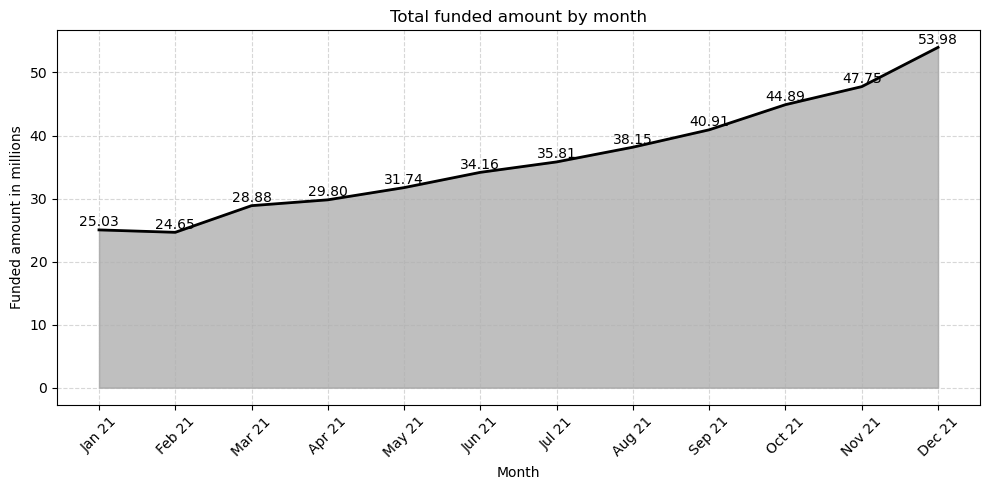

In [51]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign( month_name = lambda x : x['issue_date'].dt.strftime("%b %y"))
    .groupby('month_name',sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name='loan_amount_millions')
)


plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='gray',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='black',linewidth=2)

for i ,row in monthly_funded.iterrows():
              plt.text(i,row['loan_amount_millions'] + 0.1     
                 ,f"{row['loan_amount_millions']:.2f}",  
                 ha='center',va='bottom', fontsize=10,rotation=0,color='black'
            )

plt.title("Total funded amount by month",fontsize=12) 
plt.xlabel("Month")
plt.ylabel("Funded amount in millions")
plt.xticks(ticks=range(len(monthly_funded)),label=monthly_funded['month_name'],rotation=45)
plt.grid(True,linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()


### Monthly trends by issue date for total loan applications

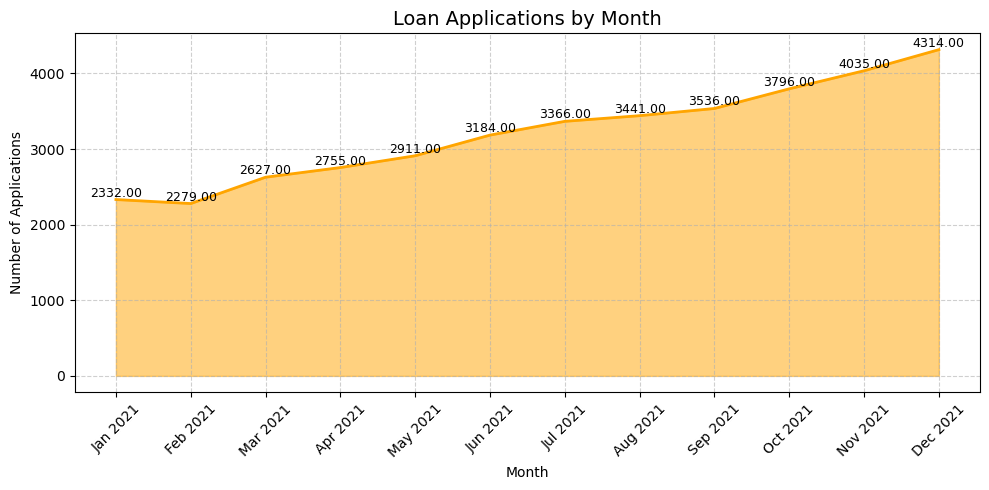

In [47]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name',sort=False)['id']
    .count()
    .reset_index(name='loan_application_count')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_application_count'], color='orange',alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_application_count'],color='orange',linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_application_count']+ 0.1, f"{row['loan_application_count']:.2f}", ha='center', va='bottom', fontsize=9,rotation=0,color='black')

plt.title("Loan applications by month", fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()

### Monthly trends by loan amount received

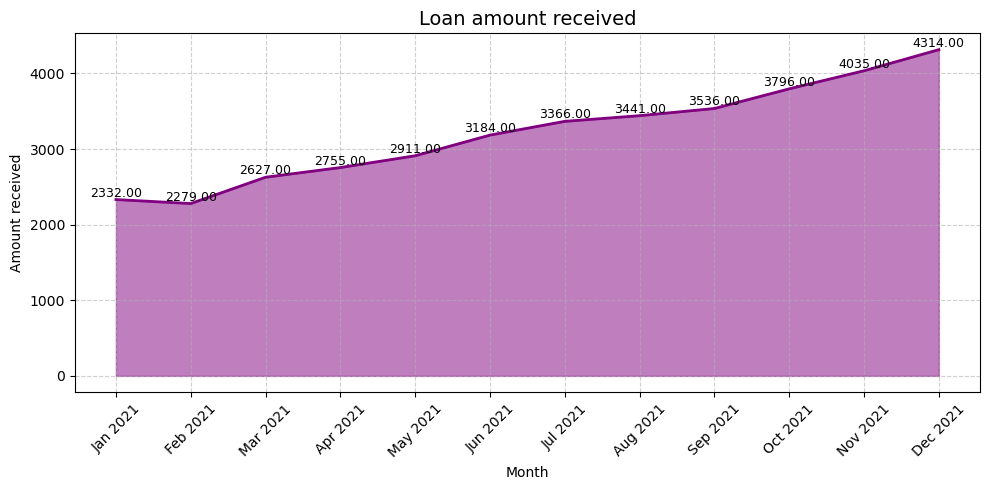

In [50]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name',sort=False)['total_payment']
    .count()
    .reset_index(name='loan_amount_received')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_received'], color='purple',alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_received'],color='purple',linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_received']+ 0.1, f"{row['loan_amount_received']:.2f}", ha='center', va='bottom', fontsize=9,rotation=0,color='black')

plt.title("Loan amount received", fontsize=14)
plt.xlabel('Month')
plt.ylabel('Amount received')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()